#### $$ Search\ Engine\ Project $$

###### $$ Released\ by\ Jakup\ Ymeraj $$

###### $$December\ 2024$$

##### **Import libraries:**

In [24]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np                                             #type: ignore
import pandas as pd                                            #type: ignore
import matplotlib.pyplot as plt                                #type: ignore
from sklearn.model_selection import train_test_split           #type: ignore
import tensorflow as tf                                        #type: ignore
import seaborn as sns                                          #type: ignore

##### **Load and display the data**

In [25]:
df = pd.read_excel(r"C:\Users\Perdorues\Downloads\Project_Datasets\Search_Engine_Dataset.xlsx")
print(print(df.describe(include='all')))

           Date      Google        bing      Yahoo!       Baidu      YANDEX  \
count       190  190.000000  190.000000  190.000000  190.000000  190.000000   
unique      190         NaN         NaN         NaN         NaN         NaN   
top     2009-01         NaN         NaN         NaN         NaN         NaN   
freq          1         NaN         NaN         NaN         NaN         NaN   
mean        NaN   91.382263    2.993368    2.589211    0.863684    0.496895   
std         NaN    1.014893    0.661482    1.136008    0.433554    0.524185   
min         NaN   88.730000    0.000000    1.080000    0.000000    0.000000   
25%         NaN   90.610000    2.730000    1.530000    0.490000    0.165000   
50%         NaN   91.560000    3.045000    2.430000    0.890000    0.345000   
75%         NaN   92.135000    3.390000    3.405000    1.107500    0.637500   
max         NaN   93.370000    4.220000    6.010000    2.180000    2.780000   

         YANDEX RU  Ask Jeeves  DuckDuckGo       Na

##### **Check for missing values**

In [26]:
missing_values = df.isnull().sum()
print(missing_values)

Date                    0
Google                  0
bing                    0
Yahoo!                  0
Baidu                   0
YANDEX                  0
YANDEX RU               0
Ask Jeeves              0
DuckDuckGo              0
Naver                   0
AOL                     0
Haosou                  0
Sogou                   0
Babylon                 0
Shenma                  0
Seznam                  0
Conduit                 0
MSN                     0
Mail.ru                 0
Ecosia                  0
Webcrawler              0
Daum                    0
CocCoc                  0
StartPagina (Google)    0
AVG Search              0
SweetIM                 0
Windows Live            0
Other                   0
dtype: int64


##### **Discard the missing values**

In [27]:
df = df.dropna(subset=df.select_dtypes(include='number').columns)

##### **Determine the Uniform Distribution (Kurtosis)**

In [28]:
df2 = df[[
    'Google', 'bing', 'Yahoo!', 'Baidu', 'YANDEX', 'YANDEX RU', 
    'Ask Jeeves', 'DuckDuckGo', 'Naver', 'AOL', 'Haosou', 'Sogou', 'Babylon',  
    'Shenma','Seznam','Conduit', 'MSN', 'Mail.ru', 'Ecosia', 'Webcrawler', 'Daum', 
    'CocCoc', 'StartPagina (Google)', 'AVG Search', 'SweetIM', 'Windows Live', 'Other']]

uniform_distribution = df2.kurtosis()
print(uniform_distribution)

Google                  -0.575118
bing                     8.959287
Yahoo!                  -0.188200
Baidu                   -0.070399
YANDEX                   2.442144
YANDEX RU               -0.646720
Ask Jeeves              -1.192469
DuckDuckGo              -1.424522
Naver                    1.599164
AOL                      1.232559
Haosou                   8.299329
Sogou                    3.404945
Babylon                 12.852629
Shenma                  13.956498
Seznam                  26.037039
Conduit                 10.817186
MSN                     32.915714
Mail.ru                  0.387571
Ecosia                  -1.180951
Webcrawler               5.334228
Daum                    22.350607
CocCoc                   3.948500
StartPagina (Google)    -0.119176
AVG Search              15.266663
SweetIM                 13.685813
Windows Live            37.364058
Other                   17.172498
dtype: float64


##### **A kurtosis value of three indicates a normal distribution, while values greater than three suggest heavier tails (leptokurtic), and values less than three indicate lighter tails (platykurt ic).**

##### **A kurtosis value of 3.4 is slightly greater than 3, which suggests that the distribution is leptokurtic. This means that the distribution has heavier tails and a sharper peak compared to a normal distribution.**

##### **A kurtosis value of 3.94 is significantly greater than 3, indicating a more pronounced leptokurtic distribution. This suggests even heavier tails and a sharper peak than the distribution with a kurtosis of 3.4.** 

In [29]:
skewness = df2.skew()
print(skewness)

Google                 -0.436841
bing                   -2.265745
Yahoo!                  0.616212
Baidu                   0.401504
YANDEX                  1.567743
YANDEX RU              -0.242770
Ask Jeeves              0.604164
DuckDuckGo              0.457329
Naver                   0.812690
AOL                     1.251548
Haosou                  2.381188
Sogou                   1.796050
Babylon                 3.650937
Shenma                  3.447362
Seznam                  4.914905
Conduit                 3.415258
MSN                     5.802603
Mail.ru                 1.083195
Ecosia                  0.824065
Webcrawler              2.150351
Daum                    3.967198
CocCoc                  2.169972
StartPagina (Google)    1.066916
AVG Search              3.789981
SweetIM                 3.780344
Windows Live            6.196375
Other                   3.548195
dtype: float64


##### **Skewness indicates the asymmetry of a distribution. It can be positive, negative, or zero. A positive skewness means the tail on the right side is longer or fatter, while a negative skewness indicates a longer or fatter tail on the left.**

##### **Density Plot for 'Google' Search Engine**

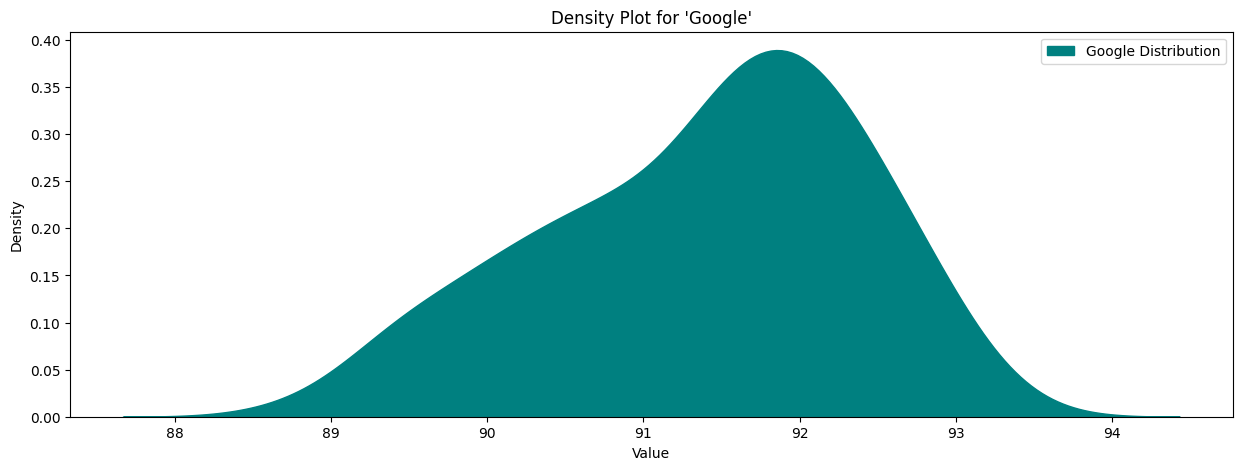

In [30]:
plt.figure(figsize=(15, 5))

sns.kdeplot(df['Google'], label="Google Distribution", color='teal', alpha=1, fill=True)

plt.title("Density Plot for 'Google'")

plt.xlabel("Value")

plt.ylabel("Density")

plt.legend()

plt.show()

##### **Density Plot for 'Bing' Search Engine**

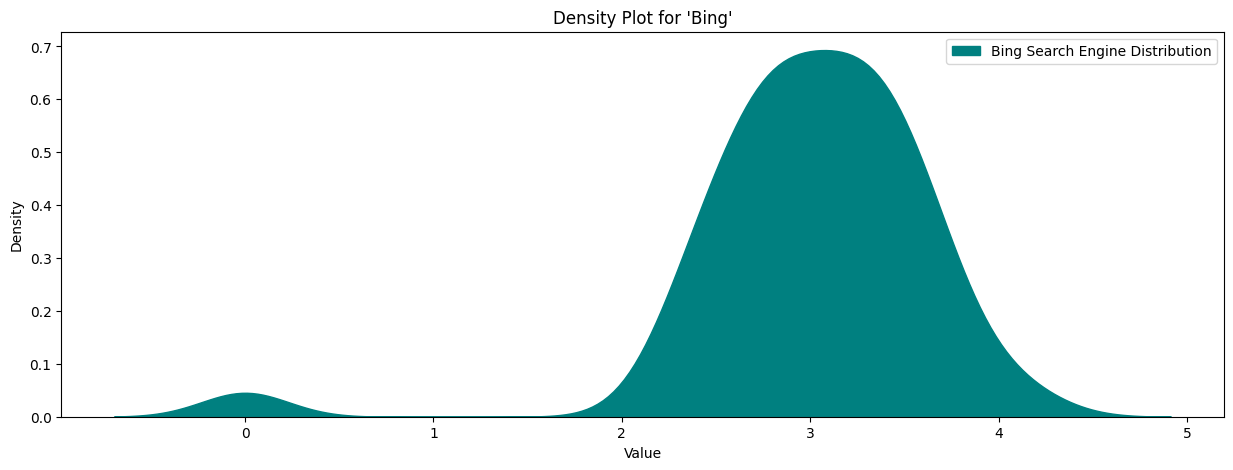

In [31]:
plt.figure(figsize=(15, 5))

sns.kdeplot(df['bing'], label="Bing Search Engine Distribution", color='teal', alpha=1, fill=True)

plt.title("Density Plot for 'Bing'")

plt.xlabel("Value")

plt.ylabel("Density")

plt.legend()

plt.show()

##### **Density Plot for 'Yahoo!' Search Engine**

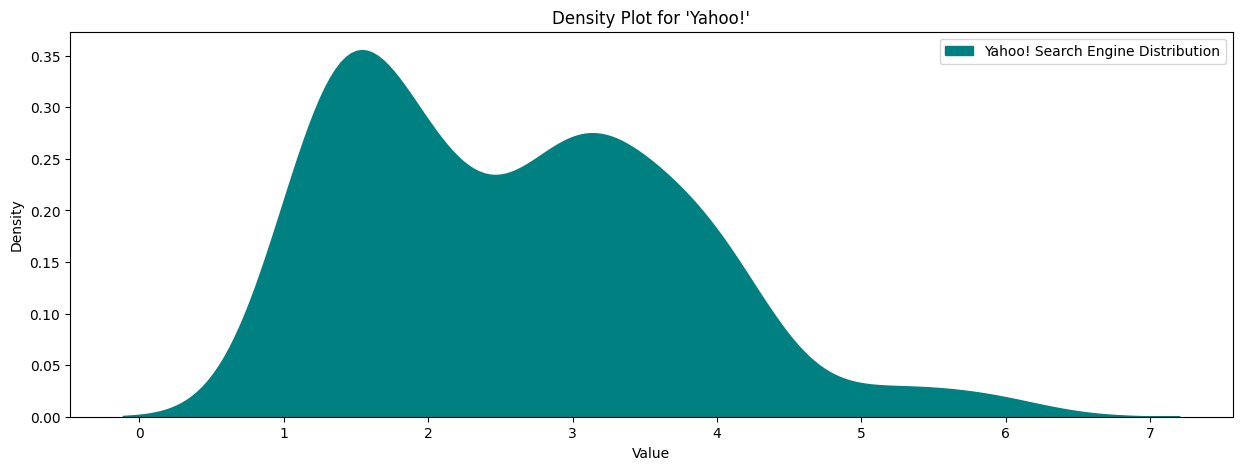

In [32]:
plt.figure(figsize=(15, 5))

sns.kdeplot(df['Yahoo!'], label="Yahoo! Search Engine Distribution", color='teal', alpha=1, fill=True)

plt.title("Density Plot for 'Yahoo!'")

plt.xlabel("Value")

plt.ylabel("Density")

plt.legend()

plt.show()

###### ****

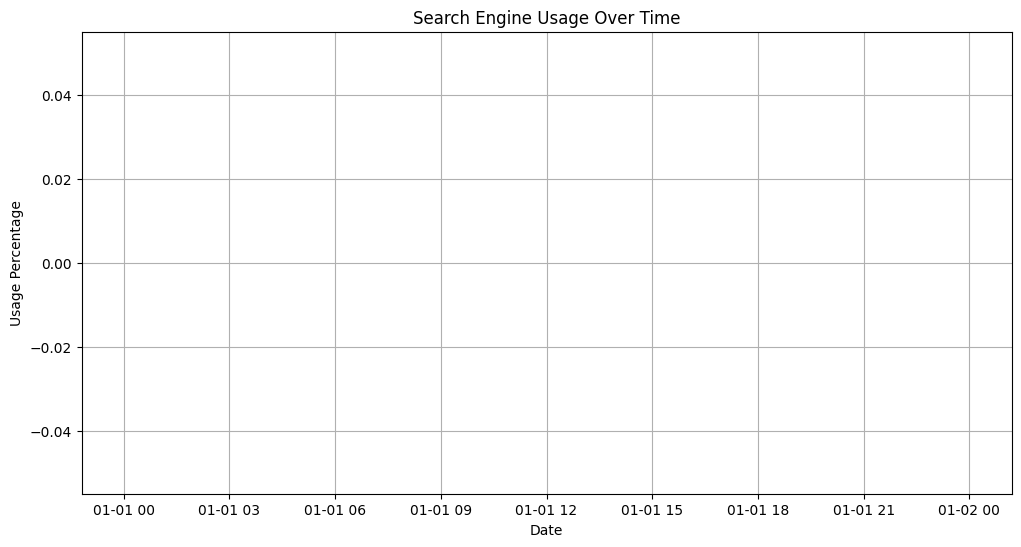

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a date range from January 2009 to October 2024
date_range = pd.date_range(start='2009-01-01', end='2024-10-31', freq='M')

# Assuming 'data' is your DataFrame with 'date' and 'usage_percentage' columns
df['Date'] = pd.to_datetime(df['Date'])
time_series = pd.merge(pd.DataFrame(date_range, columns=['Date']), df, on='Date', how='left')

time_series['Google'].fillna(method='ffill', inplace=True)  # Forward fill


plt.figure(figsize=(12, 6))
plt.plot(time_series['Date'], time_series['Google'], marker='o')
plt.title('Search Engine Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Usage Percentage')
plt.grid()
plt.show()

###### ****